In [108]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE


In [109]:
# Simulated transaction data [Transaction Amount ($), Number of Transactions per Day]

X = np.array([

    [20,1],[25,2],[18,1],[30,3],[40,2], # Normal transactions

    [5000,10],[7000,12], [15000,1],[12000,3] # Fraudulent Transactions


])

In [110]:
# Standardize the data

X_scaled = StandardScaler().fit_transform(X)

In [111]:
# Set optimized parameters

optimal_eps = 0.6  # Adjust this based on the elbow point

optimal_min_samples = 3  # Higher value means stricter cluster formation

In [112]:
dbscan_optimized = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)

labels_optimized = dbscan_optimized.fit_predict(X_scaled)


1️⃣ PCA Visualization

Principal Component Analysis (PCA) reduces high-dimensional data to 2D while preserving variance.

In [113]:
# Reduce data to 2D using PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

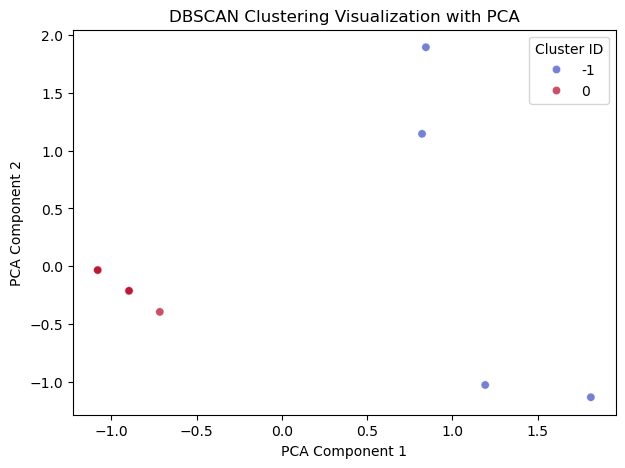

In [114]:
# Scatter plot of PCA-reduced data with DBSCAN clusters

plt.figure(figsize=(7,5))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_optimized, palette='coolwarm', alpha=0.7)

plt.xlabel("PCA Component 1")

plt.ylabel("PCA Component 2")

plt.title("DBSCAN Clustering Visualization with PCA")

plt.legend(title="Cluster ID")

plt.show()


2️⃣ t-SNE Visualization

t-Distributed Stochastic Neighbor Embedding (t-SNE) helps visualize complex cluster structures in non-linear spaces.

In [115]:
# Reduce dimensions to 2D using t-SNE

tsne = TSNE(n_components=2, perplexity=8, random_state=42)

X_tsne = tsne.fit_transform(X_scaled)

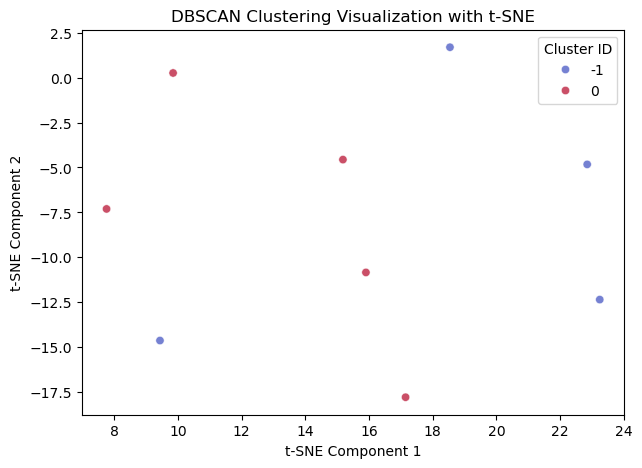

In [116]:
# Scatter plot of t-SNE-reduced data

plt.figure(figsize=(7,5))

sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_optimized, palette='coolwarm', alpha=0.7)

plt.xlabel("t-SNE Component 1")

plt.ylabel("t-SNE Component 2")

plt.title("DBSCAN Clustering Visualization with t-SNE")

plt.legend(title="Cluster ID")

plt.show()